# EDA and Visualization

Problem Statement: We are tasked with creating an automated system to estimate the annual medical charges for new customers, using information such as their age, sex, BMI, children, smoking habits and region of residence. Estimates from the system will be used to determine the annual insurance premium offered to the customer.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

df= pd.read_csv('/kaggle/input/insurance/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


As we can see there are no null values. However, let's check for duplicates.

In [3]:
columns=df.columns

In [4]:
df.shape

(1338, 7)

In [5]:
df.duplicated().sum()

1

In [6]:
df=df.drop_duplicates()
df.shape

(1337, 7)

We found a single duplicate which is dropped now.

In [7]:
for i in columns:
  print (i)
  print(df[i].value_counts())
  print('--------------------------------')

age
18    69
19    67
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64
--------------------------------
sex
male      675
female    662
Name: sex, dtype: int64
--------------------------------
bmi
32.30    13
28.31     9
30.80     8
31.35     8
28.88     8
         ..
46.20     1
23.80     1
44.77     1
32.12     1
30.97     1
Name: bmi, Length: 548, dtype: int64
--------------------------------
children
0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64
--------------------------------
smoker
no     1063
yes     274
Name: smoker, dtype: int64
--------------------------------
regio

Partitioning the bmi values into different categories to draw better insights

In [8]:
def bmi_to_cat(bmi:float) -> str:
  if bmi<18.5:
     return 'Underweight'
  elif 18.5<=bmi<25:
     return 'Normal weight'
  elif 25<=bmi<30:
     return 'Overweight'
  elif 30<=bmi<35:
     return 'Obese'
  elif 35<=bmi<40:
     return 'Severely Obese'
  elif 40<=bmi:
     return 'Morbidly Obese'

df.insert(3,'bmi_cat',df['bmi'].apply(bmi_to_cat))
df.head()

,age,sex,bmi,bmi_cat,children,smoker,region,charges
0,19,female,27.900,Overweight,0,yes,southwest,16884.92400
1,18,male,33.770,Obese,1,no,southeast,1725.55230
2,28,male,33.000,Obese,3,no,southeast,4449.46200
3,33,male,22.705,Normal weight,0,no,northwest,21984.47061
4,32,male,28.880,Overweight,0,no,northwest,3866.85520


In [9]:
fig=px.scatter(df,x='bmi',y='age',color='bmi_cat')
fig.show()

Let's dive deep into visualizing different categorical variables with respect to charges.

In [10]:
pd.crosstab(df.sex,df.smoker,margins=True)

smoker,no,yes,All
sex,,,
female,547,115,662
male,516,159,675
All,1063,274,1337


In [11]:
fig=px.strip(df,x='sex',y='charges',color='smoker')
fig.show()

Observations: For most customers, the annual medical charges are about 10,000 dollars. But there are few outliers who have higher medical expenses, possibly due to some other reasons. However, there is a significant difference in medical expenses between smokers and non-smokers.

In [12]:
pd.crosstab([df.sex,df.smoker],df.bmi_cat,margins=True)

bmi_cat        Morbidly Obese  Normal weight  Obese  Overweight  \
sex    smoker                                                     
female no                  33             89    160         168   
       yes                  7             28     27          31   
male   no                  37             86    156         144   
       yes                 14             22     47          43   
All                        91            225    390         386   

bmi_cat        Severely Obese  Underweight   All  
sex    smoker                                     
female no                  89            8   547  
       yes                 18            4   115  
male   no                  86            7   516  
       yes                 32            1   159  
All                       225           20  1337

In [13]:
a=df.groupby(['sex','smoker','bmi_cat'])['charges'].mean().reset_index()
a.head(24)

,sex,smoker,bmi_cat,charges
0,female,no,Morbidly Obese,8765.530138
1,female,no,Normal weight,8168.805664
2,female,no,Obese,9073.602635
3,female,no,Overweight,8427.927867
4,female,no,Severely Obese,9641.476742
5,female,no,Underweight,6366.336356
6,female,yes,Morbidly Obese,46505.912930
7,female,yes,Normal weight,19618.968270
8,female,yes,Obese,39420.306286
9,female,yes,Overweight,22479.403700


In [14]:
fig=px.bar(a,x='sex',y='charges',color='bmi_cat',barmode='group')
fig.show()

In [15]:
fig=px.histogram(df,x='bmi_cat',color='sex',barmode='group',facet_row='smoker')
fig.show()

Here we can observe that the average charges for non-smoking males & females of different bmi categories, is almost 10,000 dollars. Both genders who happen to be smokers as well as any form of obese, have average charges as high as 50,000 dollars.

In [16]:
fig=px.histogram(df,x='bmi_cat',color='sex')
fig.show()

In [17]:
pd.crosstab(df.region,df.bmi_cat,margins=True)

bmi_cat,Morbidly Obese,Normal weight,Obese,Overweight,Severely Obese,Underweight,All
region,,,,,,,
northeast,15,73,90,98,38,10,324
northwest,8,63,104,107,35,7,324
southeast,55,41,94,80,94,0,364
southwest,13,48,102,101,58,3,325
All,91,225,390,386,225,20,1337


In [18]:
fig=px.strip(df,x='region',y='charges',color='bmi_cat')
fig.show()

In [19]:
pd.crosstab(df.region,df.smoker,margins=True)

smoker,no,yes,All
region,,,
northeast,257,67,324
northwest,266,58,324
southeast,273,91,364
southwest,267,58,325
All,1063,274,1337


In [20]:
fig=px.strip(df,x='region',y='charges',color='smoker')
fig.show()

We see that the southeaster part of U.S is leading in charges but majority of all customers from all parts of US are charged between 0-20k only.

In [21]:
fig=px.scatter(df,x='age',y='charges',color='smoker')
fig.show()

Observations:

Medical charges increase with age, which is a quite natural trend.

We can see three clusters of points, each of which seems to form a line with an increasing slope:

i. The first cluster consists of non-smokers who have relatively low medical charges compared to others.

ii. The second cluster contains a mix of smokers and non-smokers. It's possible that these are actually two distinct but overlapping clusters: "non-smokers with other medical issues" and "smokers without major medical issues".

iii. The final cluster consists of smokers with major medical issues that are possibly related to or worsened by smoking.

In [22]:
fig=px.ecdf(df,x='charges',color='smoker')
fig.show()

Observation: Almost 67% of non-smokers have medical charges of 10,000 dollars or less. Whereas, for smokers, the charges start only from nearly 13,000 dollars, and almost 55% of smokers have medical charges more than 30,000 dollars.

In [23]:
fig=px.ecdf(df,x='charges',color='sex')
fig.show()

It can be seen that almost 61% of both males & females have medical charges of equal to or less than 12,000 dollars. However, after that point, the percentage of females seem to increase by a bit.

In [24]:
fig=px.scatter(df,x='bmi',y='charges',color='smoker')
fig.show()

It appears that for non-smokers, an increase in BMI doesn't seem to be related to an increase in medical charges. However, medical charges seem to be significantly higher for smokers with a BMI greater than 30.

In [25]:
fig=px.scatter_3d(df,x='age',y='bmi',z='charges',color='smoker')
fig.update_traces(marker_size=5,marker_opacity=0.5)
fig.show()

We can see that it's harder to interpret a 3D scatter plot compared to a 2D scatter plot. As we add more features, it becomes impossible to visualize all feature at once, which is why we use measures like correlation and loss (rmse).

# Getting dummy variables

In [26]:
df.drop(['bmi_cat'],axis=1,inplace=True)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [27]:
columns_to_encode=['sex','smoker','region']

In [28]:
df_encoded=pd.get_dummies(df,columns=columns_to_encode)
df_encoded


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


<AxesSubplot:>

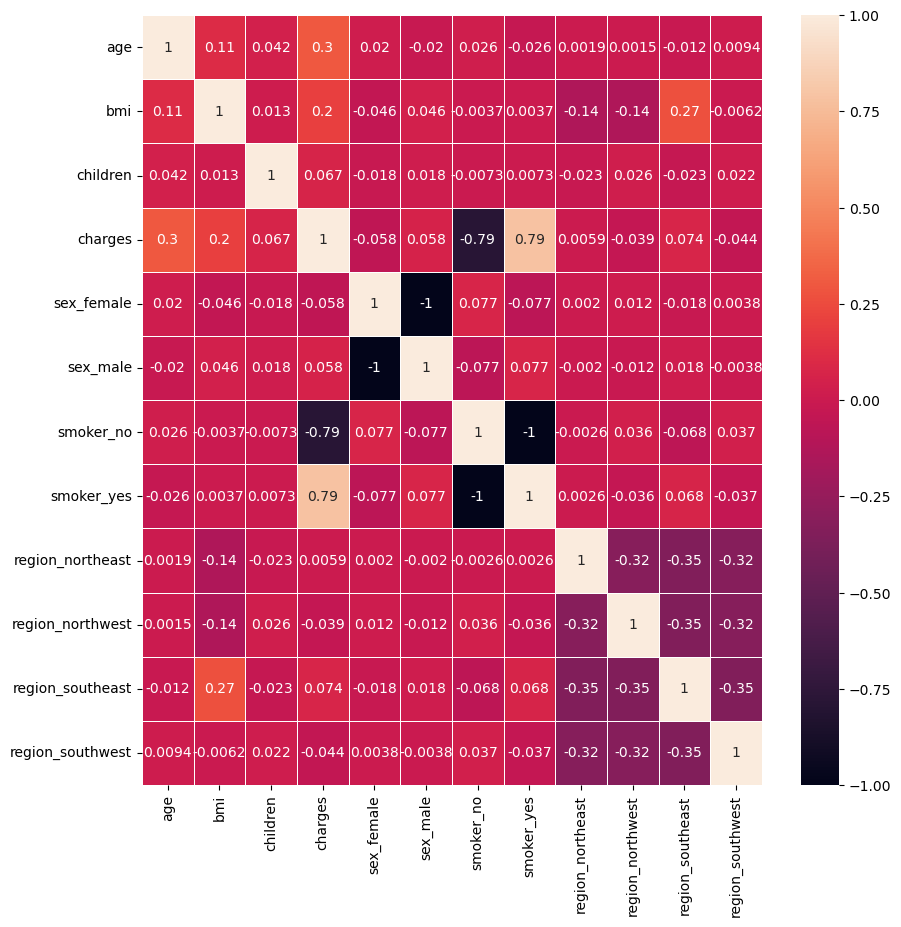

In [29]:
plt.figure(figsize=(10,10))
sns.heatmap(df_encoded.corr(),linewidths=0.5,annot=True)

We see that smoker_yes is highly correlated with charges. Also, age and bmi have positive correlation with charges.

# **SIMPLE LINEAR REGRESSION**

In [30]:
import statsmodels.api as sm


In [31]:
X=sm.add_constant(df['age'])    
Y=df['charges']

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.7,random_state=0)

In [33]:
df_lm=sm.OLS(Y_train,X_train).fit()

In [34]:
print(df_lm.params)

const    3891.812952
age       233.023890
dtype: float64


In [35]:
df_lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.076     
Dependent Variable: charges          AIC:                20113.8862
Date:               2023-04-02 17:39 BIC:                20123.5673
No. Observations:   935              Log-Likelihood:     -10055.   
Df Model:           1                F-statistic:        77.64     
Df Residuals:       933              Prob (F-statistic): 5.93e-18  
R-squared:          0.077            Scale:              1.2859e+08
--------------------------------------------------------------------
            Coef.     Std.Err.    t     P>|t|     [0.025     0.975] 
--------------------------------------------------------------------
const     3891.8130  1104.8771  3.5224  0.0004  1723.4807  6060.1452
age        233.0239    26.4451  8.8116  0.0000   181.1250   284.9227
-------------------------------------------------------------------
Omnibus:              302.164       Durbin-Watson:          1.956  
Prob(Omnibus):        0.000         Jarque-Bera (JB):       695.345
Skew:                 1.801         Prob(JB):               0.000  
Kurtosis:             5.207         Condition No.:          125    
===================================================================

"""

In [36]:
lr_pred=df_lm.predict(X_test)
lr_pred

1248     8086.242979
610     14843.935802
393     15309.983583
503      8319.266870
198     15776.031364
            ...     
1320    11115.553555
97      16708.126926
786     17873.246378
1181     9484.386322
1163     8086.242979
Length: 402, dtype: float64

In [37]:
fig=px.scatter(x=Y_test,y=lr_pred,labels={'x':'Actual','y':'Predicted'})
fig.show()

Majority of the predictions are not close to the actual charges. Hence we need to add more features to create a better model.

In [38]:
from sklearn.metrics import mean_squared_error,r2_score
MSE=mean_squared_error(Y_test, lr_pred)
RMSE=np.sqrt(mean_squared_error(Y_test, lr_pred))
Rsquare=np.abs(r2_score(Y_test,lr_pred))

print('MSE:',MSE)
print('RMSE:',RMSE)
print('R square:',Rsquare)

MSE: 146173303.34737504
RMSE: 12090.215190284043
R square: 0.10739068301367438


Assumptions

1. Linearity check

In [39]:
px.scatter(df,'age','charges',trendline='ols',trendline_color_override='red')


2. Normality of residuals

In [40]:
residual=Y_test-lr_pred

In [41]:
import plotly.figure_factory as ff

fig=ff.create_distplot(hist_data=[residual.tolist()],group_labels=['residual'],bin_size=[100])
fig.show()

3. Homoscedasticity

In [42]:
fig=px.scatter(x=lr_pred,y=residual,labels={'x':'Predicted','y':'residual'})
fig.show()

4. Autocorrelation of errors

In [43]:
px.line(list(residual))

## **MULTIPLE LINEAR REGRESSION**

In [44]:
df_encoded.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [45]:
X=df_encoded.drop(['charges'],axis=1)
Y=df_encoded['charges']

In [46]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=100)

In [47]:
from sklearn.linear_model import LinearRegression

mlr=LinearRegression()
mlr.fit(X_train,Y_train)

LinearRegression()

In [48]:
mlr_pred=mlr.predict(X_test)

In [49]:
fig=px.scatter(x=Y_test,y=mlr_pred,labels={'x':'Actual','y':'Predicted'})
fig.show()

In [50]:
mse = mean_squared_error(Y_test,mlr_pred)
rmse = np.sqrt(mean_squared_error(Y_test,mlr_pred))
r2 = np.abs(r2_score(Y_test,mlr_pred))

print('MSE:',mse)
print('RMSE:',rmse)
print('R square:',r2)

MSE: 31814749.20047716
RMSE: 5640.456470931866
R square: 0.7573516713161299


In [51]:
mlr.coef_

array([   264.42482253,    306.13118015,    562.4537963 ,     96.88141056,
          -96.88141056, -11999.74358009,  11999.74358009,    532.23700839,
          164.02413352,    -44.10923987,   -652.15190205])

In [52]:
mlr.intercept_

217.49650813551307

In [53]:
weights_df=pd.DataFrame({'features':np.append(X.columns,1),'weights':np.append(mlr.coef_,mlr.intercept_)})
weights_df

,features,weights
0,age,264.424823
1,bmi,306.131180
2,children,562.453796
3,sex_female,96.881411
4,sex_male,-96.881411
5,smoker_no,-11999.743580
6,smoker_yes,11999.743580
7,region_northeast,532.237008
8,region_northwest,164.024134
9,region_southeast,-44.109240


While it seems like "sex_female" ,"region_northeast","bmi" have a higher weight than age, keep in mind that the range of values for "sex_female" and "region_northeast" columns only take the values 0 and 1, while that of bmi ranges from 15 to 53.

Because different columns have different ranges, we run into two issues:

We can't compare the weights of different columns to identify which features are important.
A column with a larger range of inputs may disproportionately affect the loss and dominate the optimization process. For this reason, it's common practice to scale (or standardize) the values in numerical columns.
We can apply scaling using the StandardScaler class from scikit-learn.

In [54]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [55]:
numerical_columns=['age','bmi','children']
scaler.fit(df_encoded[numerical_columns])

StandardScaler()

In [56]:
scaled_inputs=scaler.transform(df_encoded[numerical_columns])
scaled_inputs


array([[-1.44041773, -0.45315959, -0.90923416],
       [-1.51164747,  0.50942165, -0.07944162],
       [-0.79935006,  0.3831546 ,  1.58014347],
       ...,
       [-1.51164747,  1.01448983, -0.90923416],
       [-1.29795825, -0.79752426, -0.90923416],
       [ 1.55123139, -0.26129928, -0.90923416]])

In [57]:
categorical_columns = ['smoker_yes', 'smoker_no','sex_male', 'sex_female', 
              'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']
categorical_data = df_encoded[categorical_columns].values
categorical_data

array([[1, 0, 0, ..., 0, 0, 1],
       [0, 1, 1, ..., 0, 1, 0],
       [0, 1, 1, ..., 0, 1, 0],
       ...,
       [0, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 0]], dtype=uint8)

In [58]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = df_encoded.charges


In [59]:
model = mlr.fit(inputs, targets)
predictions = model.predict(inputs)

In [60]:
mse = mean_squared_error( targets, predictions )
rmse = np.sqrt(mean_squared_error( targets, predictions ))
r2 = np.abs(r2_score( targets, predictions ))

print('MSE:',mse)
print('RMSE:',rmse)
print('R square:',r2)

MSE: 36528121.63726907
RMSE: 6043.849901947357
R square: 0.7507482551410236


In [61]:
weights_df = pd.DataFrame({
    'features': np.append(numerical_columns + categorical_columns, 1),
    'weights': np.append(mlr.coef_, mlr.intercept_)})
weights_df.sort_values('weights', ascending=False)

,features,weights
11,1,20329.945485
3,smoker_yes,11923.664422
0,age,3604.738802
1,bmi,2068.812016
7,region_northeast,586.143380
2,children,572.215898
8,region_northwest,236.916848
6,sex_female,64.740739
5,sex_male,-64.740739
10,region_southwest,-373.938006


As we can see now, the most important features are:

Smokers,
Age,
BMI

We need to check the multicollinearity among the significant independent variables, using VIF.

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df_encoded[['smoker_yes', 'age', 'bmi', 'region_northeast', 'children', 'sex_female']]

vif_data = pd.DataFrame()
vif_data["features"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                   for i in range(len(X.columns))]

print(vif_data)

           features       VIF
0        smoker_yes  1.251830
1               age  7.731824
2               bmi  8.535734
3  region_northeast  1.286603
4          children  1.798456
5        sex_female  1.912356


As we can see, age and bmi have very high values of VIF, indicating that these two variables are highly correlated. This is expected as the age of a person does influence their bmi. Hence, considering these two features together leads to a model with high multicollinearity.

In [63]:
X = df_encoded[['smoker_yes', 'age', 'region_northeast', 'children', 'sex_female']]

vif_data = pd.DataFrame()
vif_data["features"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                   for i in range(len(X.columns))]

print(vif_data)

           features       VIF
0        smoker_yes  1.218482
1               age  2.800464
2  region_northeast  1.281118
3          children  1.720478
4        sex_female  1.815517


In [64]:
import statsmodels.api as sm
X = sm.add_constant(df_encoded[['age','smoker_yes','region_northeast','children','sex_female']])
Y = df_encoded['charges']

In [65]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=100)


In [66]:
df_encoded_model1 = sm.OLS(y_train,x_train).fit()
df_encoded_model1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: Ordinary least squares
=========================================================================
Model:                OLS                Adj. R-squared:       0.722     
Dependent Variable:   charges            AIC:                  19084.1478
Date:                 2023-04-02 17:39   BIC:                  19113.1910
No. Observations:     935                Log-Likelihood:       -9536.1   
Df Model:             5                  F-statistic:          486.9     
Df Residuals:         929                Prob (F-statistic):   1.27e-256 
R-squared:            0.724              Scale:                4.2567e+07
-------------------------------------------------------------------------
                   Coef.    Std.Err.    t    P>|t|    [0.025     0.975]  
-------------------------------------------------------------------------
const            -2944.4421 709.3398 -4.1510 0.0000 -4336.5363 -1552.3479
age                275.5462  15.1119 18.2337 0.0000   245.8888   305.2036
smoker_yes       24110.2428 530.3857 45.4579 0.0000 23069.3497 25151.1358
region_northeast    92.5143 502.5607  0.1841 0.8540  -893.7716  1078.8002
children           581.8644 179.5576  3.2405 0.0012   229.4789   934.2499
sex_female          74.0536 428.3195  0.1729 0.8628  -766.5324   914.6395
-------------------------------------------------------------------------
Omnibus:                181.882         Durbin-Watson:            1.992  
Prob(Omnibus):          0.000           Jarque-Bera (JB):         417.336
Skew:                   1.056           Prob(JB):                 0.000  
Kurtosis:               5.500           Condition No.:            146    
=========================================================================

"""

Looking at the VIF values, our model does not exhibit any multicollinearity. Now, we can trust the model coefficients. Since the P values for region_northeast and sex_female are not-significant, let’s drop these terms to build the final model.

In [67]:
significant_variables = ['smoker_yes', 'age', 'children']
x_train = x_train[significant_variables] 
x_test = x_test[significant_variables]
df_encoded_model2 = sm.OLS(y_train, x_train).fit() 
df_encoded_model2.summary2() 

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.870     
Dependent Variable:     charges          AIC:                         19097.3325
Date:                   2023-04-02 17:39 BIC:                         19111.8541
No. Observations:       935              Log-Likelihood:              -9545.7   
Df Model:               3                F-statistic:                 2084.     
Df Residuals:           932              Prob (F-statistic):          0.00      
R-squared (uncentered): 0.870            Scale:                       4.3309e+07
----------------------------------------------------------------------------------
                  Coef.      Std.Err.      t      P>|t|      [0.025       0.975]  
----------------------------------------------------------------------------------
smoker_yes      23741.6428   527.4160   45.0150   0.0000   22706.5823   24776.7034
age               216.9107     7.0870   30.6069   0.0000     203.0023     230.8190
children          375.0234   174.4923    2.1492   0.0319      32.5800     717.4668
--------------------------------------------------------------------------------
Omnibus:                   186.518           Durbin-Watson:              1.983  
Prob(Omnibus):             0.000             Jarque-Bera (JB):           408.230
Skew:                      1.101             Prob(JB):                   0.000  
Kurtosis:                  5.372             Condition No.:              102    
================================================================================

"""

In [68]:
mlr_pred = df_encoded_model2.predict(x_test)

In [69]:
mse = mean_squared_error(y_test,mlr_pred)
rmse = np.sqrt(mean_squared_error(y_test,mlr_pred))
r2 = np.abs(r2_score(y_test,mlr_pred))

print('MSE:',mse)
print('RMSE:',rmse)
print('R square:',r2)

MSE: 37336387.28829204
RMSE: 6110.350831850168
R square: 0.7152386172366281


Assumptions:

1. There must be a linear relationship between the outcome variable and the independent variables. Scatterplots can show whether there is a linear or curvilinear relationship.

In [70]:
fig = px.scatter_3d(df_encoded, x='age', y='children', z='charges', color='smoker_yes')
fig.update_traces(marker_size=5, marker_opacity=0.5)
fig.show()

2. Multivariate Normality: Multiple regression assumes that the residuals are normally distributed.

In [71]:
residual = y_test - mlr_pred
fig = ff.create_distplot(hist_data=[residual.tolist()], group_labels=['residual'], bin_size=[50])
fig.show()

3. No Multicollinearity: Multiple regression assumes that the independent variables are not highly correlated with each other. This assumption is tested using Variance Inflation Factor (VIF) values, which we have already done

Thus our final model gives 71.5% accuracy on the test data.